In [36]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
import scipy.linalg as sla
import matplotlib.pyplot as plt
import scipy
from matplotlib import pylab, gridspec, pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [3]:
W = None # W - веса модели, на которые умножаются признаки
b = None # b - bias, который добавляется к итоговому результату

In [4]:
def mse(preds, y):
    """
    Возвращает среднеквадратичную ошибку между preds и y.
    """
    return ((preds - y)**2).mean()

In [5]:
def solve_weights(X, y):
    """
    Находит параметры W,b по методу наименьших квадратов для X и y.
    Решает систему линейных уравнений, к которым приводит метод наименьших 
    квадратов, для признаков X и значений y.
    """
    # ключевое слово global позволяет нам использовать глобальные переменные,
    # определенные в начале ячейки
    global W, b
    
    
    N = X.shape[0]
    # добавляем к признакам фиктивную размерность, чтобы было удобнее находить bias
    bias = np.ones((N, 1))
    X_b = np.append(bias, X, axis=1)
    
    # используем формулу из метода наименьших квадратов
    # W_full сожержит коэффициенты W и b, так как мы добавили фиктивную размерность к признакам
    W_full = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
    
    # мы разделяем bias, который лежал в начале вектора W_full, и веса модели W
    W = W_full[1:]
    b = np.array([W_full[0]])
    # нам не нужно возвращать W и b, так как они уже лежат в глобальных переменных

In [6]:
def grad_descent(X, y, lr, num_iter=100):
    """
    Находит приближенные значения параметров модели, используя градиентный спуск.
    Функции потерь (ошибки) для данной реализации спуска - сумма квадратов ошибки.
    Возвращаемое значение - список значений ффункции потерь на каждом шаге.
    """
    # ключевое слово global позволяет нам использовать глобальные переменные,
    # определенные в начале ячейки
    global W, b
    W = np.random.rand(X.shape[1])
    b = np.array(np.random.rand(1))
    
    losses = []
    
    N = X.shape[0]
    for iter_num in range(num_iter):
        preds = predict(X)
        losses.append(mse(preds, y))
        
        w_grad = np.zeros_like(W)
        b_grad = 0
        for sample, prediction, label in zip(X, preds, y):
            w_grad += 2 * (prediction - label) * sample
            b_grad += 2 * (prediction - label)
            
        W -= lr * w_grad
        b -= lr * b_grad
    return losses

In [7]:
def predict(X):
    """
    Предсказывает значения y, используя текущие параметры модели W и b
    """
    global W, b
    return np.squeeze(X@W + b.reshape(-1, 1))

In [8]:

def generate_data(range_, a, b, std, num_points=100):
    """Генерирует данные в заданном промежутке, которые подчиняются зависимости y = a*x + b + е,
    где е - нормально распределено со стандартным отклонением std и нулевым средним."""
    X_train = np.random.random(num_points) * (range_[1] - range_[0]) + range_[0]
    y_train = a * X_train + b + np.random.normal(0, std, size=X_train.shape)
    
    return X_train, y_train

In [13]:
# Зададим параметры для искусственных данных
real_a = 0.34
real_b = 13.7
real_std = 7

# Генерируем данные для промежутка от 0 до 150 с параметрами, которые мы задали выше
X_train, y_train = generate_data([0, 150], real_a, real_b, real_std)

# просто выведем табличку с данными
pd.DataFrame({'X': X_train, 'Y': y_train}).head(10)

,X,Y
0,66.590202,53.033795
1,115.519117,64.555881
2,110.928254,50.272710
3,138.283194,64.436495
4,44.967216,34.085423
5,100.254678,60.092292
6,93.670081,51.023286
7,128.942623,65.840993
8,27.917000,22.172659
9,85.012876,46.989246


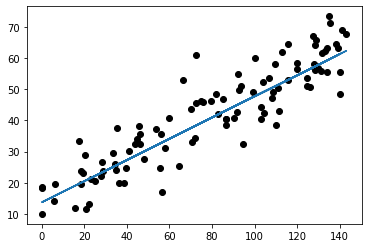

In [14]:
plt.scatter(X_train, y_train, c='black')
plt.plot(X_train, 0.34*X_train+13.7)
plt.show()

In [15]:
# Используем функцию, написанную выше, чтобы найти W и b, с помощтю метода наименьших квадратов
solve_weights(X_train.reshape(-1, 1), y_train)

In [16]:
# Полученные веса лежат в глобальных переменных, выведем их
W, b

(array([0.34419146]), array([14.67488418]))

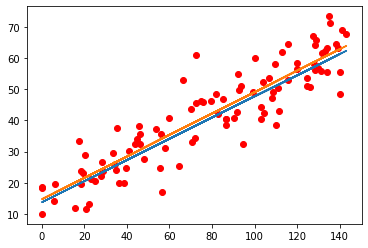

In [17]:
# Выведем данные, истинную зависимость и полученную нами с помощью метода наименьших квадратов
plt.scatter(X_train, y_train, c='r')
plt.plot(X_train, 0.34*X_train+13.7)
plt.plot(X_train, np.squeeze(X_train.reshape(-1, 1) @ W + b.reshape(-1, 1)))
plt.show()

In [18]:
# Найдем параметры с помощью градиентного спуска
# чтобы проследить за обучением, мы записываем значение функции ошибки на каждом шаге и после выводим
losses = grad_descent(X_train.reshape(-1, 1), y_train, 1e-9, 15000)

In [19]:
# Полученные веса лежат в глобальных переменных, выведем их
W, b

(array([0.48232248]), array([0.65631561]))

([<matplotlib.lines.Line2D at 0x208a4359408>], 90.611335625155)

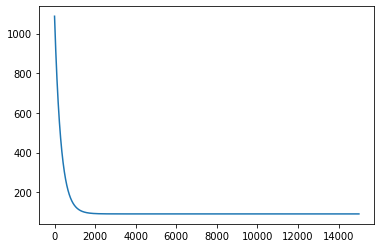

In [20]:
# Выведем график функции потерь 
plt.plot(losses), losses[-1]

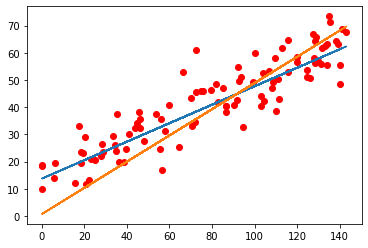

In [21]:
# Выведем данные, истинную зависимость и полученную нами
plt.scatter(X_train, y_train, c='r')
plt.plot(X_train, real_a * X_train + real_b)
plt.plot(X_train, np.squeeze(X_train.reshape(-1, 1) @ W + b.reshape(-1, 1)))
plt.show()

In [23]:
np.random.seed(40)
func = lambda x, y: (0.43*x + 0.5*y + 0.67 + np.random.normal(0, 7, size=x.shape))

X = np.random.sample(size=(30)) * 10
Y = np.random.sample(size=(30)) * 150
result_train = [func(x, y) for x, y in zip(X, Y)]
data_train = np.concatenate([X.reshape(-1, 1), Y.reshape(-1, 1)], axis=1)

pd.DataFrame({'x': X, 'y': Y, 'res': result_train}).head()

,x,y,res
0,4.076870,95.538336,50.402755
1,0.553660,54.344384,20.324860
2,7.885349,2.186182,1.304317
3,2.873052,81.297734,28.323912
4,4.503506,47.723322,36.323593


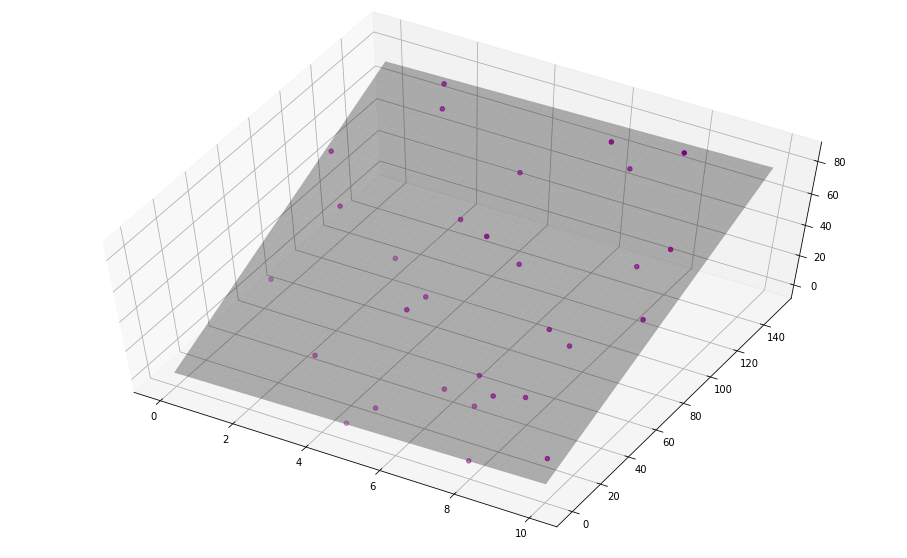

In [45]:
fig = plt.figure(figsize=(16, 10))
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(np.linspace(0, 10, 100), np.linspace(0, 150, 100))
ax.scatter(xs=data_train[:, 0], ys=data_train[:, 1], zs=result_train, c='purple')
ax.plot_surface(X,Y, 0.43*X + 0.5*Y + 0.67, color='black', alpha=0.3)

ax.view_init(elev=60)
plt.ion()

In [32]:
losses = grad_descent(data_train, result_train, 1e-2, 5)

In [33]:
W, b

(array([1.69940941e+16, 3.24783982e+17]), array([3.25905776e+15]))

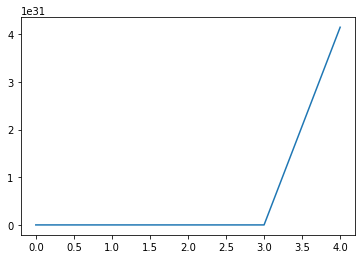

In [34]:
plt.plot(losses), losses[-1];

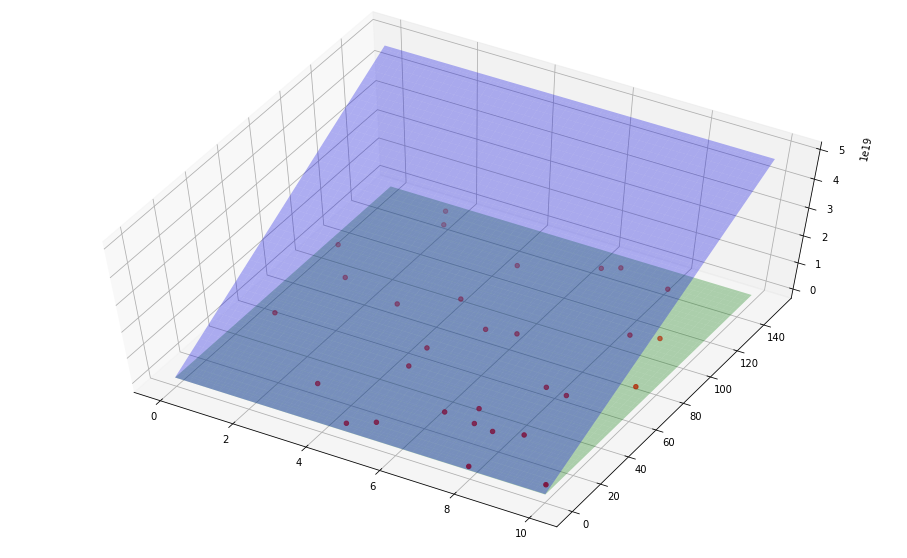

In [46]:
fig = plt.figure(figsize=(16, 10))
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(np.linspace(0, 10, 100), np.linspace(0, 150, 100))
ax.scatter(xs=data_train[:, 0], ys=data_train[:, 1], zs=result_train, c='r')
ax.plot_surface(X,Y, 0.43*X + 0.5*Y + 0.67, color='green', alpha=0.3)
ax.plot_surface(X,Y, W[0]*X + W[1]*Y + b, color='blue', alpha=0.3)

ax.view_init(elev=60)

In [47]:
data_train.mean(axis=0)


array([ 5.60526683, 70.83031083])

In [48]:
data_train.std(axis=0)

array([ 2.68995679, 45.29829861])